<a href="https://colab.research.google.com/github/UrviGoel/imageDetection/blob/main/GroceryDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
trainingdata = pd.read_csv("/content/drive/MyDrive/dataset/train.txt", header = None)
trainingdata.columns = ['Pic', 'ClassID', 'TypeID']
trainingdata.to_csv('train.csv', index = None)
trainingdata
# trainingdata = pd.read_csv("train.csv")
# trainingdata["Pic"][0]
# PIL.Image.open("/content/drive/MyDrive/dataset/" + trainingdata["Pic"][0])

,Pic,ClassID,TypeID
0,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0
1,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0
2,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0
3,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0
4,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0
...,...,...,...
2635,train/Vegetables/Zucchini/Zucchini_026.jpg,80,42
2636,train/Vegetables/Zucchini/Zucchini_027.jpg,80,42
2637,train/Vegetables/Zucchini/Zucchini_028.jpg,80,42
2638,train/Vegetables/Zucchini/Zucchini_029.jpg,80,42


In [4]:
import pathlib 

data_dir = "/content/drive/MyDrive/dataset/train/AllCategories/"
data_dir = pathlib.Path(data_dir)

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

4536


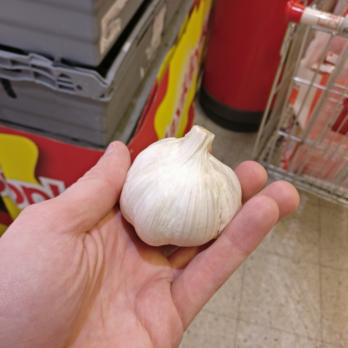

In [ ]:
roses = list(data_dir.glob('Garlic/*'))
PIL.Image.open(str(roses[0]))

In [6]:
batch_size = 36
img_height = 248
img_width = 248

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4536 files belonging to 69 classes.
Using 3629 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4536 files belonging to 69 classes.
Using 907 files for validation.


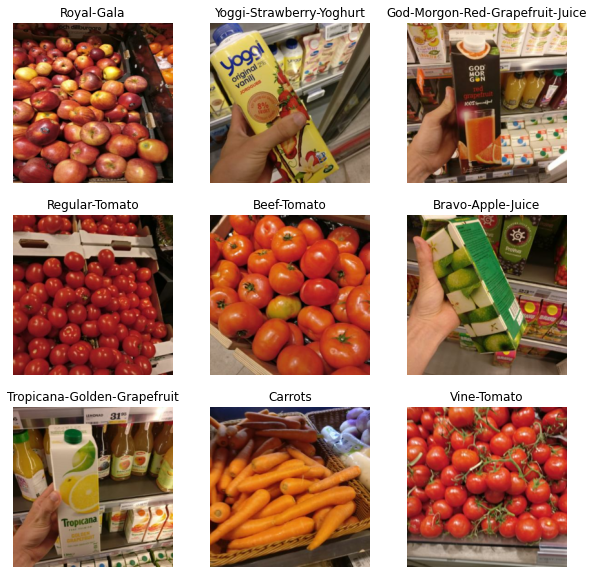

In [8]:
import matplotlib.pyplot as plt

class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
class_names

['Alpro-Blueberry-Soyghurt',
 'Alpro-Fresh-Soy-Milk',
 'Alpro-Shelf-Soy-Milk',
 'Alpro-Vanilla-Soyghurt',
 'Anjou',
 'Asparagus',
 'Aubergine',
 'Avocado',
 'Banana',
 'Beef-Tomato',
 'Bravo-Apple-Juice',
 'Bravo-Orange-Juice',
 'Brown-Cap-Mushroom',
 'Cabbage',
 'Cantaloupe',
 'Carrots',
 'Conference',
 'Cucumber',
 'Floury-Potato',
 'Galia-Melon',
 'Garlic',
 'Ginger',
 'God-Morgon-Apple-Juice',
 'God-Morgon-Orange-Juice',
 'God-Morgon-Orange-Red-Grapefruit-Juice',
 'God-Morgon-Red-Grapefruit-Juice',
 'Golden-Delicious',
 'Granny-Smith',
 'Green-Bell-Pepper',
 'Honeydew-Melon',
 'Kaiser',
 'Kiwi',
 'Leek',
 'Lemon',
 'Lime',
 'Mango',
 'Nectarine',
 'Oatly-Natural-Oatghurt',
 'Oatly-Oat-Milk',
 'Orange',
 'Orange-Bell-Pepper',
 'Papaya',
 'Passion-Fruit',
 'Peach',
 'Pineapple',
 'Pink-Lady',
 'Plum',
 'Pomegranate',
 'Red-Beet',
 'Red-Bell-Pepper',
 'Red-Delicious',
 'Red-Grapefruit',
 'Regular-Tomato',
 'Royal-Gala',
 'Satsumas',
 'Solid-Potato',
 'Sweet-Potato',
 'Tropicana-Apple-

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
normalization_layer = layers.Rescaling(1./255)

In [11]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [12]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [13]:
#class_names = train_ds.class_names
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 248, 248, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 64)       

In [ ]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
101/101 [==============================] - 364s 4s/step - loss: 2.1907 - accuracy: 0.3370 - val_loss: 1.9172 - val_accuracy: 0.3815
Epoch 2/15
101/101 [==============================] - 219s 2s/step - loss: 1.3549 - accuracy: 0.5839 - val_loss: 1.6343 - val_accuracy: 0.4829
Epoch 3/15
101/101 [==============================] - 214s 2s/step - loss: 0.6994 - accuracy: 0.7760 - val_loss: 1.6198 - val_accuracy: 0.5292
Epoch 4/15
101/101 [==============================] - 214s 2s/step - loss: 0.3878 - accuracy: 0.8812 - val_loss: 1.6073 - val_accuracy: 0.5601
Epoch 5/15
101/101 [==============================] - 214s 2s/step - loss: 0.1448 - accuracy: 0.9537 - val_loss: 1.7413 - val_accuracy: 0.5722
Epoch 6/15
101/101 [==============================] - 215s 2s/step - loss: 0.1028 - accuracy: 0.9713 - val_loss: 1.7815 - val_accuracy: 0.5810
Epoch 7/15
101/101 [==============================] - 214s 2s/step - loss: 0.0166 - accuracy: 0.9981 - val_loss: 1.9857 - val_accuracy: 0.5943

KeyboardInterrupt: ignored

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: ignored

In [16]:
sunflower_path = "/content/drive/MyDrive/dataset/val/Yellow-Bell-Pepper/Yellow-Bell-Pepper_004.jpg"

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Tropicana-Juice-Smooth with a 1.69 percent confidence.


In [17]:
import pickle
 
# Save the model as a pickle in a file
pickle.dump(model, open('model.pkl', 'wb'))
 
# Load the model from the file
cnn_from_joblib = pickle.load(open('model.pkl', 'rb'))
 
# Use the loaded model to make predictions
predictions = cnn_from_joblib.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
print(score)

INFO:tensorflow:Assets written to: ram://bbb22bd9-a9cf-4182-820f-3c4369808bb0/assets
This image most likely belongs to Tropicana-Juice-Smooth with a 1.69 percent confidence.
tf.Tensor(
[0.01515342 0.01434923 0.01476356 0.01470461 0.01619567 0.01554502
 0.01406079 0.01252725 0.01522656 0.0154035  0.01496567 0.01432317
 0.01643466 0.01309915 0.01461916 0.01414504 0.01545029 0.0134377
 0.01431937 0.01578638 0.01473616 0.0146266  0.0141781  0.01552022
 0.01482958 0.01376443 0.01396686 0.01322172 0.01349592 0.01363432
 0.01482274 0.01394101 0.01311448 0.01468379 0.01341225 0.01434712
 0.01529798 0.01532878 0.01536962 0.01458697 0.01416632 0.01468479
 0.01367439 0.01449464 0.0155247  0.0136701  0.01571599 0.01484487
 0.01455347 0.01373595 0.01415316 0.01392158 0.01444533 0.0140486
 0.01340945 0.01420606 0.01444384 0.01572622 0.0151916  0.01685371
 0.01379127 0.01507759 0.01538583 0.01464633 0.0131128  0.01470022
 0.01590333 0.01095805 0.01357094], shape=(69,), dtype=float32)


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/dataset/classes.csv")
#data

categories =[]
description = []
for i in data.index:
  desc = ""
  categories.append(data['Class Name (str)'][i])
  desc_path = data['Product Description Path (str)'][i]
  with open('/content/drive/MyDrive/dataset' + desc_path) as f:
    desc = f.read()
  
  description.append(desc)

descriptions_data = {'category' : categories,
                     'description' : description}
df=pd.DataFrame(descriptions_data)                
df.to_csv('descriptions.csv')